# Máxima Verosimilitud

Como mencionamos en la Toolbox, es posible darle un enfoque iterativo al método de Máxima Verosimilitud. En linea con este bloque y para seguir poniendo en práctica el enfoque coputacional, trabajarás el Notebook de esa manera.

### Problema de las manzanas

Estás trabajando en una fábrica agroindustrial y necesitas conocer la distribución del peso de las manzanas que cosechan. Sabes que estas tienen una distribución Normal y cuentas con una muestra de 100 manzanas. Con esta, deberás definir los parámetros de su distribución.

Recordemos que la función Normal cuenta con dos parámetros: mu y sigma. 



In [105]:
#importamos las librerías que vamos a usar
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

Generamos una muestra de 100 manzanas. Como nosotros definimos la función, conocemos los parámetros de la Distribución. Pero generalmente no sabemos esta información: es de la población.

In [146]:
mu_teo = 250
sigma_teo = 20
n = 100
muestra = np.random.normal(mu_teo, sigma_teo, n) 

Exploramos la muestra:

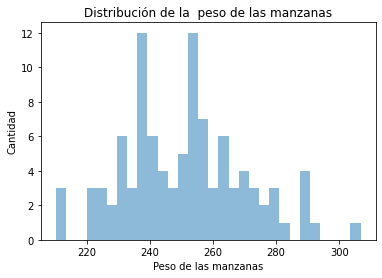

In [147]:
#Hacemos un histograma con la distribución de la muestra
plt.hist(muestra, bins=30, alpha=0.5)
plt.title('Distribución de la  peso de las manzanas')
plt.xlabel('Peso de las manzanas')
plt.ylabel('Cantidad')

plt.show()

In [148]:
#averiguamos el promedio y la desviación estandar de la muestra
mu = muestra.mean()
std = muestra.std()

print(f"{mu=}")
print(f"{std=}")

mu=251.2282256764417
std=19.241307348972313


In [149]:
muestra

array([254.12093518, 242.38596977, 243.77080649, 254.86770557,
       241.31646511, 222.79923998, 220.97362459, 261.15877103,
       266.74101361, 262.87500261, 248.76017902, 244.86349774,
       287.52489761, 253.17967695, 254.6240692 , 237.77143919,
       227.64465455, 247.9787601 , 279.53065248, 271.57295176,
       279.99481883, 230.17324829, 251.43056229, 256.42276794,
       254.31221875, 263.56020549, 239.73948996, 237.00349844,
       281.55636465, 276.34828089, 249.23468702, 239.0377807 ,
       240.55560109, 224.76661867, 254.89331242, 233.21895384,
       231.57829141, 288.69397791, 255.55605163, 251.64925149,
       257.92862106, 230.15520579, 250.4957875 , 268.15054978,
       234.50042205, 274.51954791, 231.786516  , 277.40118673,
       237.38910001, 238.84907845, 251.67191328, 222.95855391,
       271.14901781, 271.11773957, 253.55216458, 259.39594593,
       264.05923149, 252.88333837, 236.2877947 , 230.0162506 ,
       233.24699872, 268.62554033, 262.35636353, 256.63

Notemos que los valores de mu y sigma de la muestra, es decir, los datos, son parecidos pero no iguales a los de la función distribución con la que los generamos. El método de máxima verosimilitud sirve para estimar los parámetros de la función generadora (que en este caso los conocemos "de casualidad") a partir de lo medido.

Vuelvan a las primeras celdas y generen nuevamente los datos y calculen mu y sigma y repítanlo dos o tres veces. ¿son iguales los valores cada vez? ¿por qué piensan que pasa esto, si fueron generados con la misma función?

In [150]:
error_estandar = np.std(muestra) / np.sqrt(n)
error_estandar

1.9241307348972314

In [151]:
#también podemos usar la función normal de la liberería Scipy para generar los parámetros
norm.fit(muestra)

(251.2282256764417, 19.241307348972313)

**Ya nos hemos aproximado a los dos parámetros que necesitábamos para la función de densidad.**

¿Entonces? ¿Y todo lo que aprendimos? Te propongo que repasemos lo que acaba de pasar:

1. Generamos una muestra con: distribución Normal, *mu* 250 y desviación estandar 20. Repetimos, estos parámetros nunca los conocemos en la vida real. 
2. Hicimos un histograma para ver su forma.
3. Obtuvimos mu y la desviación estandar de la muestra. Con eso ya tuvimos los parámetros que buscábamos. Te podrás preguntar: ¿y el método de Maxima Verosimilitud? ¿Y la iteración?. Pocas veces los parámetros de las funciones tienen un estadístico que permite calcularlos, por lo que hay que recurrir a Máxima Verosimilitud. En este caso, elegimos la Normal para poder calcular analíticamente los parámetros y despues realizar una demostración iterativa. 
4. Calculamos el error estandar de la muestra.
5. Calculamos los parámetros con la función Normal de SciPy.
6. Al repetir la generación de la muestra, obtuvimos distintos valores de mu y sigma de la muestra. La diferencia entre muestra y función distribución es que en la primera contamos con datos "reales" y calculamos parámetros a partir de los mismos. La segunda nos sirve para hacer predicciones de lo que puede llegar a pasar con el sistema que genera los datos. El método de máxima verosimilitud sirve para obtener información de la función distribución a partir de una muestra.

A continuación aplicaremos el método de máxima verosimilitud con un enfoque iterativo del mismo problema:

# Problema de las manzanas: enfoque iterativo

In [152]:
np.amin(muestra)

210.33925238298795

In [153]:
np.amax(muestra)

306.7156760288477

In [154]:
np.std(muestra)

19.241307348972313

In [188]:
#armamos dos listas con posibles valores de mu y sigma:
posibles_mu = np.linspace(np.amin(muestra), np.amax(muestra), 1000)
posibles_sigmas = np.linspace(np.std(muestra)*0.5, np.std(muestra)*1.5, 300)

In [178]:
np.std(muestra)*0.5

9.620653674486157

In [179]:
np.std(muestra)*1.5

28.86196102345847

Primero vamos a definir una función que calcula la probabilidad conjunta en función de mu, sigma y la muestra, que es lo que queremos maximizar -recordemos que la función de probabilidad conjunta es la de Verosimilitud-. Luego evaluaremos su valor para todos los posibles mu y sigma. Nos quedaremos con los valores que maximicen esta función.

In [180]:
def prob_conjunta(mu,sigma,muestra): #la función depende del mu y sigma que se nos ocurran y de la muestra
    pconj=1
  
    for i in range(len(muestra)): #armamos un for que calcula la probabilidad conjunta
        prob_sola=(1/sigma*np.sqrt(2*np.pi))*(np.e**-(((muestra[i]-mu)**2)/(2*sigma**2))) #calculamos la probabilidad de medir la muestra iésima, notemos que acá ponemos la información de que los datos fueron generados con una distribución normal
        pconj*=prob_sola #calculamos la probabilidad conjunta multiplicando el dato iésimo con el anterior.

    return pconj

In [181]:
posibles_mu[i],posibles_sigmas[j]

(219.89006914068577, 11.486867430740997)

In [182]:
#prob_conjunta(250,20,muestra)

Ahora recorremos esto para todos los mu y sigma posbles. Para eso creamos una matriz vacía del tamaño de Nmu x Nsigma y la vamos llenando con el valor de la probabilidad conjunta. Luego miramos para qué celda de la matriz esta es más grande y nos quedamos con ese mu y ese sigma.


In [183]:
#creamos la matriz de ceros
probabilidades_conjuntas=np.zeros([len(posibles_mu),len(posibles_sigmas)])

#ahora vamos rellenando calculando la probabilidad conjunta para cada mu y cada sigma

for i in range (len(posibles_mu)):
    for j in range (len(posibles_sigmas)):
        probabilidades_conjuntas[i,j]=prob_conjunta(posibles_mu[i],posibles_sigmas[j],muestra)

In [184]:
#veamos cómo quedó la matriz de probabilidades conjuntas. En general los números son bastante chicos porque es el producto de cosas muy chicas
probabilidades_conjuntas

array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        2.28433936e-160, 3.17239508e-160, 4.39165953e-160],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        3.68145646e-160, 5.10177206e-160, 7.04763440e-160],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        5.92637505e-160, 8.19534873e-160, 1.12972527e-159],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        8.23644669e-197, 1.66363631e-196, 3.34121648e-196],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        4.31405727e-197, 8.73892911e-197, 1.76015078e-196],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        2.25705602e-197, 4.58533052e-197, 9.26210942e-197]])

Text(0, 0.5, 'mu')

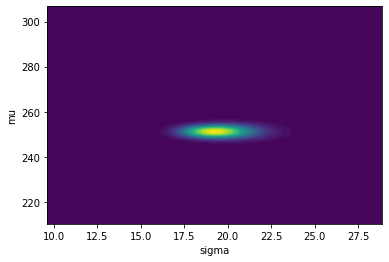

In [189]:
#podemos graficar la superficie de todos los resultados de las probabilidades conjuntas para ver dónde cae el máximo

plt.contourf(posibles_sigmas,posibles_mu,probabilidades_conjuntas,levels=50)
plt.xlabel('sigma')
plt.ylabel('mu')

In [190]:
#podemos ver que hay un máximo que corresponde a los valores de mu y sigma con amarillo más fuerte. Ese es el valor máximo
#de la probabilidad conjunta que hallamos con este método. Encontrar los índices de este valor máximo es muy fácil
maximos=np.where(probabilidades_conjuntas==np.amax(probabilidades_conjuntas))
print(maximos)

(array([424]), array([150]))


In [176]:
#La primer coordenda de "maximos" corresponde al índice de posibles mu y la segunda al de posibles sigmas. Entonces
mu_estimado=posibles_mu[maximos[0]]
sigma_estimado=posibles_sigmas[maximos[1]]
print('mu='+str(mu_estimado))
print('sigma='+str(sigma_estimado))

mu=[251.22621999]
sigma=[19.57305403]


In [191]:
#La primer coordenda de "maximos" corresponde al índice de posibles mu y la segunda al de posibles sigmas. Entonces
mu_estimado=posibles_mu[maximos[0]]
sigma_estimado=posibles_sigmas[maximos[1]]
print('mu='+str(mu_estimado))
print('sigma='+str(sigma_estimado))

mu=[251.24376052]
sigma=[19.27348345]


# Problema 2

Trabajas en el equipo de datos de un aeropuerto y, para eficientizar el trabajo y la coordinación de todo el personal, debes calcular la distribución del tráfico aereo. Para eso, empezaras por calcular la distribución de la llegada de aviones. Utilizarás una muestra que indica la cantidad de aviones que llegan por hora. Asumes que tiene una distribución Poisson.


1. A través del método de máxima verosimilitud encuentra la Función de probabilidad de la distribución. **Atención**: hazlo a través de la simulación computacional. Para esto necesitaras formular una grilla con posibles valores de los parámetros y encontrar qué parametros maximizan la función de verosimilitud. Ten en cuenta que la función "prob_conjunta" de más arriba fue creada suponiendo que los datos siguen una distribución gaussiana... Debes crear una nueva que sirva para datos hecho a partir de una poissoniana.
2. Puedes comparar el resultado que te dió, calculando los parámetros con la libería Scipy.

In [71]:
n = 100
lambda_teo = 6

In [72]:
#muestra de la cantidad de aviones por hora
muestra_aviones = np.random.poisson(lambda_teo, n)


In [73]:
print(muestra_aviones)

[ 7  6  6  9  7  4  8  4  7 11  6  8  4  8  3 10  9  8  6  9 10  4  7 10
  5 12  6  1  6  7  5  5 10  7  3  6  6  5  9  6  7  4  3  6  7  8  7  3
  7  6  3  8  8 13  8  9  5  8  6  5  2  6  8  6  3  3  3  4  7 10  3  4
  5  8  2  3  6  5  8  5  7  6  7  4  7  6  4  4  4  6  4  5  5 10  6  4
  9  4  2  7]


(array([ 4., 10., 14., 11., 19., 27.,  6.,  6.,  1.,  2.]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <BarContainer object of 10 artists>)

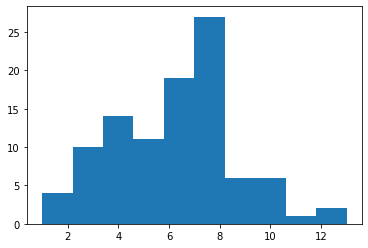

In [74]:
plt.hist(muestra_aviones)

In [75]:
#1. ahora el único parámetro es lambda (L), generamos función que calcula prob. conjunta

In [76]:
def prob_conj(L,muestra): #la función depende del parámetro lambda y de la muestra
    pconj=1
    k=muestra
    for i in range(len(muestra)): #armamos un for que calcula la probabilidad conjunta
        prob_sola=np.exp(-L)*(L**k[i])/np.math.factorial(k[i]) #calculamos la probabilidad de medir la muestra iésima, notemos que acá ponemos la información de que los datos fueron generados con una distribución normal
        pconj*=prob_sola #calculamos la probabilidad conjunta multiplicando el dato iésimo con el anterior.

    return pconj

In [77]:
#generamos de L

L=np.arange(0,150)

In [78]:
#calculamos la prob conjunta

probabilidades_conjuntas=np.zeros(len(L))

#ahora vamos rellenando calculando la probabilidad conjunta para cada mu y cada sigma

for i in range (len(L)):
    probabilidades_conjuntas[i]=prob_conj(L[i],muestra_aviones)

Text(0, 0.5, 'pconj')

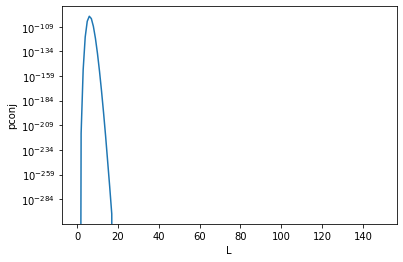

In [79]:
#grafico a ver como da
plt.semilogy(L,probabilidades_conjuntas) 
plt.xlabel('L')
plt.ylabel('pconj')

In [80]:
maximos=np.where(probabilidades_conjuntas==np.max(probabilidades_conjuntas))
print(maximos)

(array([6]),)


In [81]:
L[maximos]

array([6])

In [82]:
import scipy
from scipy.optimize import curve_fit

In [83]:
#2
#genero funcion a fitear y lo hago a mano, no existe rutina de scipy que haga esto. Otra opción es calcular el promedio.
def Poisson(x,L):

    P=np.zeros(len(x))

    for i in range(len(x)):

        P[i]=np.exp(-L)*(L**x[i])/np.math.factorial(x[i])
    return P

 

In [84]:
kmax=np.max(muestra_aviones)
x=np.arange(0,kmax)
y=np.zeros(len(x))

for i in range(len(x)):
    xx=x[i]
    y[i]=np.sum(np.where(muestra_aviones==xx))/len(muestra_aviones)

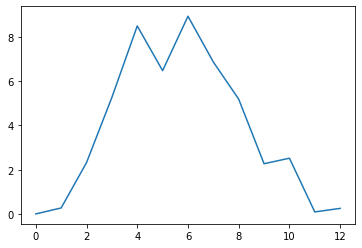

In [85]:
plt.plot(x,y)

In [86]:
pop, pcov = curve_fit(Poisson, x, y)

<ipython-input-83-2be61617352d>:9: DeprecationWarning: Using factorial() with floats is deprecated
  P[i]=np.exp(-L)*(L**x[i])/np.math.factorial(x[i])


In [87]:
pop


array([5.26374318])

$$\frac{d}{dx} log_a(x) = \frac{1}{x\ln(a)}$$

$$\frac{d}{dx} log_{10}(x) = \frac{1}{x\ln(10)} = \frac{1}{2.302 x}$$

Si $a = e$ entonces:
$$\frac{d}{dx} log_e(x) = \frac{1}{x\ln(e)}$$
Pero $\ln(e) = 1$ entonces:
$$\frac{d}{dx} log_e(x) = \frac{d}{dx}\ln(x) = \frac{1}{x}$$

$log_a(x) = \ln(x)$

$$\frac{d}{dx} e^x = e^x$$

In [91]:
def factorial(x):
    respuesta = 1
    for i in range(x,0,-1):
        respuesta *= i
    return respuesta

In [92]:
factorial(1)

1

In [93]:
factorial(2)

2

In [94]:
factorial(3)

6

In [95]:
factorial(4)

24

In [97]:
factorial(5)

120

In [99]:
def multiplica(x, a=10):
    return a * x

In [100]:
multiplica(10)

100

In [101]:
multiplica(2)

20

In [103]:
def multiplica_2(a, x=5):
    return a * x

In [104]:
multiplica_2(5)

25

$$f(\lambda) = \frac{e^{-2\lambda}\lambda^4}{6}$$

$$\frac{d}{d\lambda} \frac{e^{-2\lambda}\lambda^4}{6} = \frac{1}{6} e^{-2\lambda}\lambda^4$$